In [1]:
import tensorflow as tf
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
train_noisy_dir = 'C:\\Users\\xoryt\\OneDrive\\Documents\\info\\Hackatons\\ML&AI Electron\\train_noisy'
train_clear_dir = 'C:\\Users\\xoryt\\OneDrive\\Documents\\info\\Hackatons\\ML&AI Electron\\train'
test_noisy_dir = 'C:\\Users\\xoryt\\OneDrive\\Documents\\info\\Hackatons\\ML&AI Electron\\val_noisy'
test_clear_dir = 'C:\\Users\\xoryt\\OneDrive\\Documents\\info\\Hackatons\\ML&AI Electron\\val_noisy'

In [3]:
# Create an ImageDataGenerator object
datagen = ImageDataGenerator(rescale=1./255)

seed = 1

# Load images in batches from the training directories
train_noisy_gen = datagen.flow_from_directory(
    train_noisy_dir,
    target_size=(400, 400),
    batch_size=32,
    class_mode=None,
    seed=seed)

train_clear_gen = datagen.flow_from_directory(
    train_clear_dir,
    target_size=(400, 400),
    batch_size=32,
    class_mode=None,
    seed=seed)

# Load images in batches from the testing directories
test_noisy_gen = datagen.flow_from_directory(
    test_noisy_dir,
    target_size=(400, 400),
    batch_size=32,
    class_mode=None,
    seed=seed)

test_clear_gen = datagen.flow_from_directory(
    test_clear_dir,
    target_size=(400, 400),
    batch_size=32,
    class_mode=None,
    seed=seed)

Found 3499 images belonging to 1 classes.
Found 3499 images belonging to 1 classes.
Found 501 images belonging to 1 classes.
Found 501 images belonging to 1 classes.


(32, 400, 400, 3)
(32, 400, 400, 3)
(32, 400, 400, 3)
(32, 400, 400, 3)
(32, 400, 400, 3)
(32, 400, 400, 3)
(32, 400, 400, 3)
(32, 400, 400, 3)


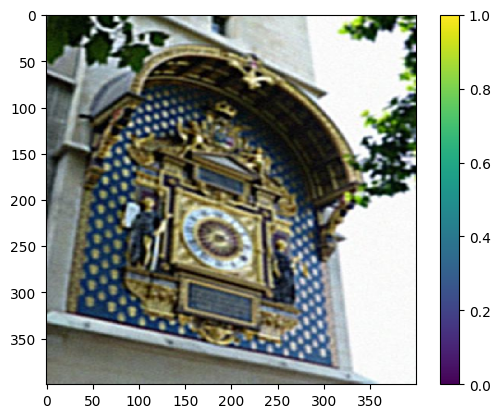

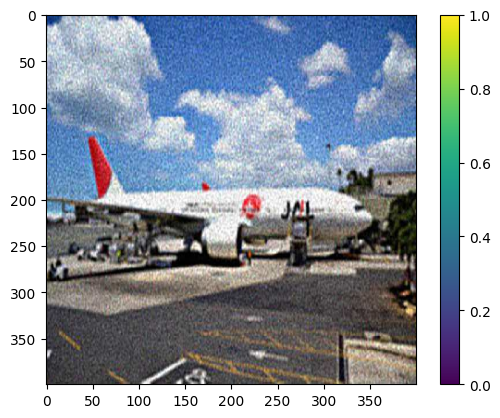

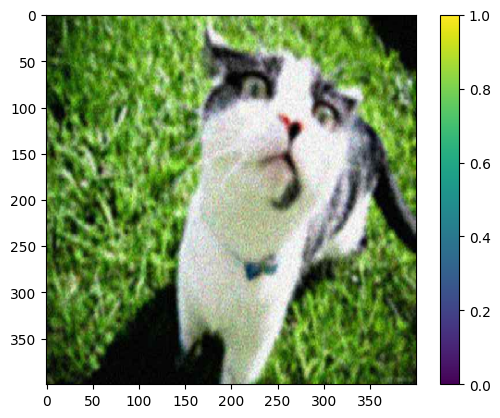

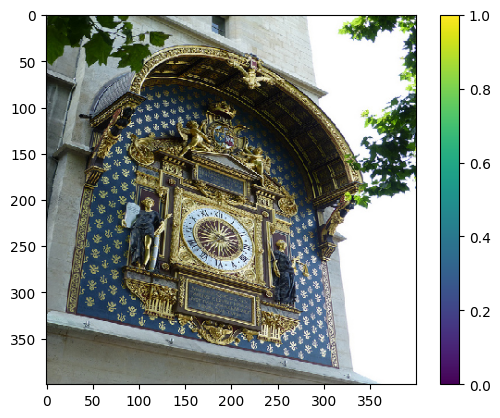

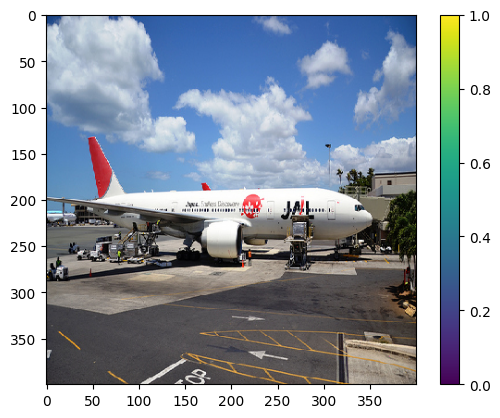

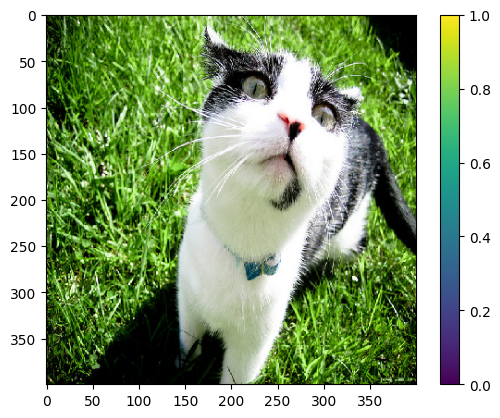

In [4]:
for idx, img in enumerate(train_noisy_gen):
    print(img.shape)
    if idx == 3:
        break
    plt.figure()
    plt.imshow(img[0])
    plt.colorbar()

for idx, img in enumerate(train_clear_gen):
    print(img.shape)
    if idx == 3:
        break
    plt.figure()
    plt.imshow(img[0])
    plt.colorbar()

In [5]:
def train_generator():
    while True:
        noisy_batch = next(train_noisy_gen)
        clear_batch = next(train_clear_gen)

        # Normalize the images to be in the range [0, 1]
        # noisy_batch = noisy_batch.astype('float32') - 0.5
        # clear_batch = clear_batch.astype('float32') - 0.5

        yield (noisy_batch, clear_batch)


In [6]:
# Define the input shape
input_img = Input(shape=(400, 400, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='Adam', loss='mean_squared_error')
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 400, 400, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 400, 400, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 200, 200, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 200, 200, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 50, 50, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 50, 50, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 100, 100, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 100, 100, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 200, 200, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 200, 200, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 400, 400, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 400, 400, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,366,659 (5.21 MB)

 Trainable params: 1,366,659 (5.21 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
autoencoder.fit(
    x=train_generator(),
    steps_per_epoch = 20,
    epochs=40)

Epoch 1/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 96s 5s/step - loss: 0.0798
Epoch 2/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 92s 5s/step - loss: 0.0428
Epoch 3/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 93s 5s/step - loss: 0.0242
Epoch 4/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 94s 5s/step - loss: 0.0195
Epoch 5/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 93s 5s/step - loss: 0.0169
Epoch 6/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - loss: 0.0153
Epoch 7/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 93s 5s/step - loss: 0.0134
Epoch 8/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 92s 5s/step - loss: 0.0146
Epoch 9/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 93s 5s/step - loss: 0.0133
Epoch 10/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 92s 5s/step - loss: 0.0132
Epoch 11/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - loss: 0.0126
Epoch 12/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 91s 5s/step - loss: 0.0126
Epoch 13/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 92s 5s/step - loss: 0.0115
Epoch 14/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 92s 5s/step - loss: 0.0121
Epoch 15/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 92s 5s/step - loss: 0.0113
Epoch 16/40
20/20 ━

In [8]:
# Get the current time
now = datetime.now()

# Format the current time as a string
time_string = now.strftime("%Y%m%d_%H%M%S")

# Create a unique filename for the model
filename = f'autoencoder_model_{time_string}.keras'

# Save the model
autoencoder.save(filename)

In [9]:
def calculate_psnr(img1, img2):
    # Ensure the images are float type
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)

    # Calculate MSE
    mse = np.mean((img1 - img2)**2)

    # If MSE is zero, PSNR is infinity
    if mse == 0:
        return float('inf')

    # Calculate MAX_I
    max_i = np.max(img1)

    # Calculate PSNR
    return 20 * np.log10(max_i/(mse**0.5))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
(400, 400, 3)
0.03701986
0.94213617
22.258041072120815


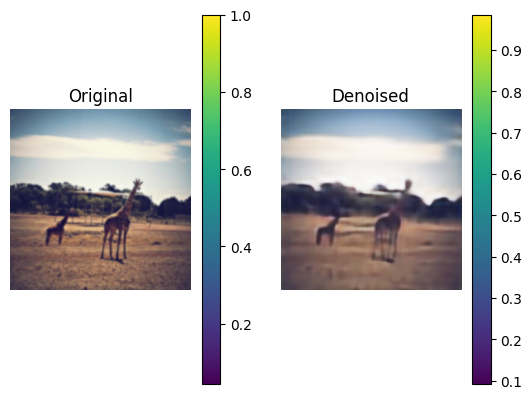

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
(400, 400, 3)
0.011848303
0.83161724
25.67560070161822


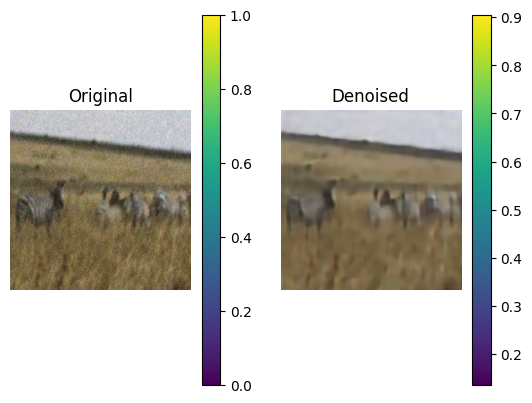

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
(400, 400, 3)
0.006755255
0.99662673
22.915243007482886


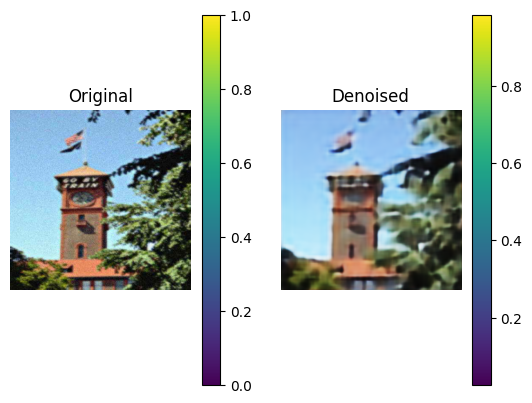

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
(400, 400, 3)
0.026240164
0.9850959
27.23884130876115


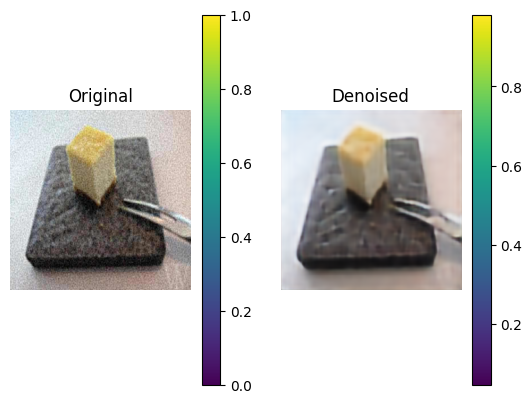

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
(400, 400, 3)
0.026113203
0.8887645
23.859426484856865


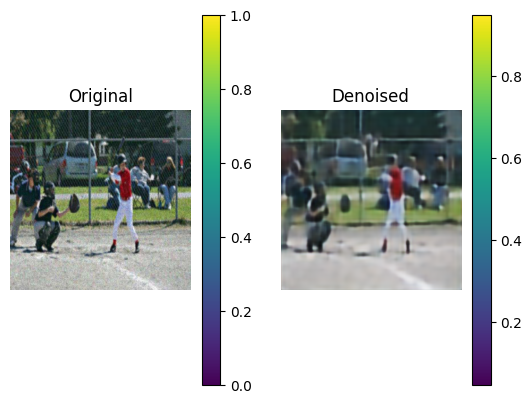

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
(400, 400, 3)
0.016539397
0.96053666
25.715999602640217


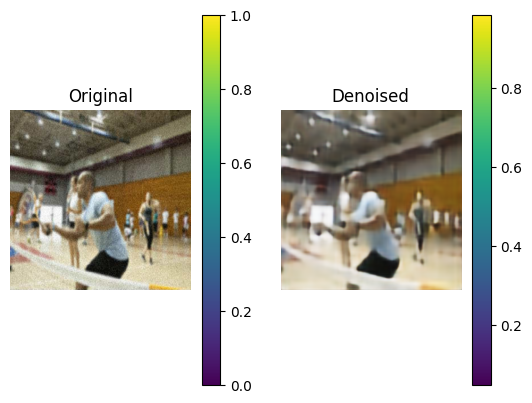

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
(400, 400, 3)
0.025275338
0.9698897
19.83645781816512


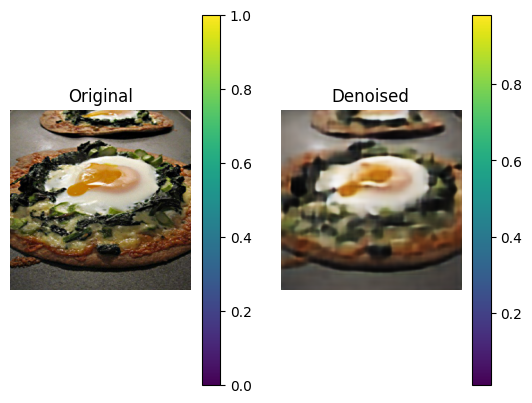

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
(400, 400, 3)
0.00943946
0.90548486
20.723412445311084


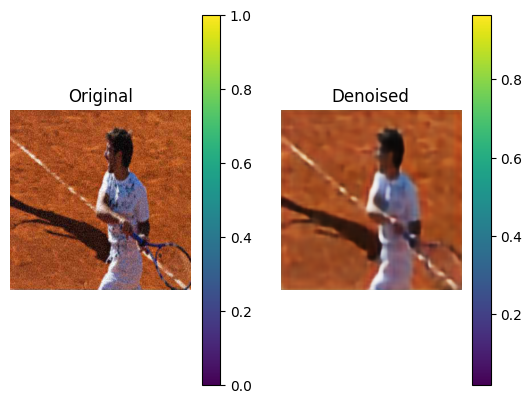

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
(400, 400, 3)
0.021643281
0.9707682
20.74494805827815


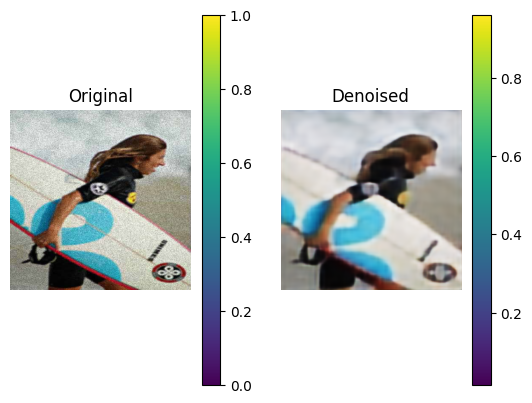

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
(400, 400, 3)
0.038678646
0.9659029
19.084882523296976


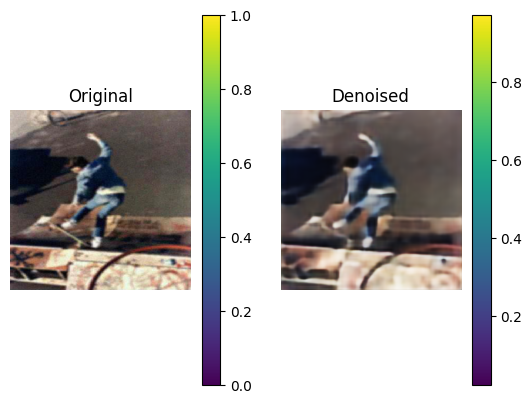

In [10]:
# Predict on the first 10 test images.
for i in range(10):
    # Get the next image from the generator
    image = next(test_noisy_gen)
    image_clean = next(test_clear_gen)
    # Predict the denoised image
    denoised_image = autoencoder.predict(image)

    # denoised_image = denoised_image - denoised_image.min()
    # denoised_image = denoised_image / denoised_image.max()

    # denoised_image = denoised_image.astype('float32') * 255.0
    # denoised_image = denoised_image.astype('uint8')
    image1 = denoised_image[0]

    print(denoised_image[0].shape)
    print(denoised_image[0].min())
    print(denoised_image[0].max())
    # denoised_image = (denoised_image - denoised_image.min()) / (denoised_image.max() - denoised_image.min())
    # Display the original (noisy) and denoised images

    print(calculate_psnr(image_clean[0], denoised_image[0]))

    fig, ax = plt.subplots(1, 2)
    
    im1 = ax[0].imshow(image[1])
    ax[0].set_title('Original')
    ax[0].axis('off')
    fig.colorbar(im1, ax=ax[0])
    
    im2 = ax[1].imshow(denoised_image[1])
    ax[1].set_title('Denoised')
    ax[1].axis('off')
    fig.colorbar(im2, ax=ax[1])

    plt.show()